In [1]:
'''import os
import cv2

# Function to resize and save the stack file
def resize_and_save_stack(stack_path, output_path, target_size=(256, 256)):
    # Read the stack file
    stack = cv2.imread(stack_path)
    
    # Resize the stack to the target size
    resized_stack = cv2.resize(stack, target_size)
    
    # Save the resized stack
    cv2.imwrite(output_path, resized_stack)

# Define the input directory containing subfolders
input_dir = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Testing"

# Iterate through each subfolder
for folder_name in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, folder_name)
    if os.path.isdir(subfolder_path):
        # Iterate through files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".tif"):  # Assuming the stack file has a .tif extension
                # Construct paths for input and output files
                stack_path = os.path.join(subfolder_path, filename)
                output_path = os.path.join(subfolder_path, "resized_" + filename)  # Append "resized_" to the filename
                
                # Resize and save the stack file
                resize_and_save_stack(stack_path, output_path)

print("Resizing and saving complete.")'''


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [50]:
'''import os

# Define the folder path
folder_path = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\sen12floods_s2_source"

# Loop through each subfolder
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Define the file names to delete
        files_to_delete = ['stack.tif']
        
        # Loop through each file to delete
        for filename in files_to_delete:
            file_path = os.path.join(subfolder_path, filename)
            # Check if the file exists before attempting to delete
            if os.path.exists(file_path):
                os.remove(file_path)
                print(f"Deleted {filename} from {subfolder}")
            else:
                print(f"{filename} does not exist in {subfolder}")

print("Deletion process completed.")'''


Deleted stack.tif from sen12floods_s2_source_0001_2018_12_18
Deleted stack.tif from sen12floods_s2_source_0001_2018_12_23
Deleted stack.tif from sen12floods_s2_source_0001_2019_01_02
Deleted stack.tif from sen12floods_s2_source_0001_2019_01_12
Deleted stack.tif from sen12floods_s2_source_0001_2019_01_17
Deleted stack.tif from sen12floods_s2_source_0001_2019_01_22
Deleted stack.tif from sen12floods_s2_source_0001_2019_01_27
Deleted stack.tif from sen12floods_s2_source_0001_2019_02_01
Deleted stack.tif from sen12floods_s2_source_0001_2019_02_06
stack.tif does not exist in sen12floods_s2_source_0004_2018_12_15
Deleted stack.tif from sen12floods_s2_source_0004_2018_12_17
stack.tif does not exist in sen12floods_s2_source_0004_2018_12_20
Deleted stack.tif from sen12floods_s2_source_0004_2018_12_22
stack.tif does not exist in sen12floods_s2_source_0004_2018_12_30
stack.tif does not exist in sen12floods_s2_source_0004_2019_01_04
stack.tif does not exist in sen12floods_s2_source_0004_2019_01_06

In [1]:
import subprocess 
from subprocess import PIPE
import rasterio
import json
import glob 
import pandas as pd
import os

import cv2

In [2]:
# This function takes as argument the a string contraining the a path for one image.
# It check if the first band is empty (if all pixels are zero) and if yes it returns True otherwise False.

def check_empty_img(url):
    # Reading Image
    # You can give path to the 
    # image as first argument
#     print(url)
    image = cv2.imread(url+'/B01.tif',0)
  
    # Checking if the image is empty or not
    if (cv2.countNonZero(image) == 0):
        return  True
    else:
        return  False

In [3]:
def stack_bands(path, product_id):
    print(path)

    
    band_list = ['B08.tif', 'B8A.tif', 'B11.tif','B12.tif']
    try:
        
        # Read metadata of first file
        with rasterio.open(path +'/'+ band_list[0]) as src0:
            meta = src0.meta

        # Update meta to reflect the number of layers
        meta.update(count = len(band_list))

        # Read each layer and write it to stack
        with rasterio.open(path + '/' + 'stack.tif', 'w', **meta) as dst:
            for id, layer in enumerate(band_list, start=1):
                with rasterio.open(path +'/'+ layer) as src1:
                    dst.write_band(id, src1.read(1))
    except:
        print("Folder with no Data")
        remove_empty_folders(path)
        
        pass

In [4]:
def product_name(path):
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [5]:
def remove_empty_folders(path):
    subprocess.run(['rm', '-r', path])
    return

In [6]:
def label(path):
    # return thr label of each product which should be either Flood or not Flood, 
    # and convert it into 0 for not flood and 1 for flooded
    
    return

In [7]:
# Create a list with all the folders containing spectral bands


flist = []
rootdir = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\sen12floods_s2_source"
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 2236


In [8]:
flist_new = []
rootdir = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\sen12floods_s2_source"
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist_new.append(d)
        
        
print(f"The number of folders after the pre-processing = {len(flist_new)}")

The number of folders after the pre-processing = 2236


In [9]:
new_flist = []  # Create a new list to store folders after preprocessing

for folder_path in flist:
    empty = check_empty_img(folder_path)
    if not empty:
        product_id = product_name(folder_path)
        stack_bands(folder_path, product_id)
        new_flist.append(folder_path)

print(f"The number of folders after preprocessing = {len(new_flist)}")

C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2018_12_18
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2018_12_23
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2019_01_02
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2019_01_12
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2019_01_17
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2019_01_22
C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\sen12floods_s2_source\sen12floods_s2_source_0001_2019_01_27
C:\Users\VASA

In [10]:
import os
from sklearn.model_selection import train_test_split

# Your existing code to create new_folder_path and preprocess the data
new_folder_path = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Dataafter_preprocess"  # Replace with the desired path
os.makedirs(new_folder_path, exist_ok=True)

# Split the folders into training and testing sets
train_folders, test_folders = train_test_split(new_flist, test_size=0.2, random_state=42)

print(f"The number of training folders = {len(train_folders)}")
print(f"The number of testing folders = {len(test_folders)}")


The number of training folders = 1559
The number of testing folders = 390


In [11]:
import os
import shutil

# Specify the paths
train_destination_path = 'C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Training'

# Create the destination folder if it doesn't exist
os.makedirs(train_destination_path, exist_ok=True)

# Function to copy only the stack.tif and stack.json file to destination folder
def copy_stack_files(source_folder, destination_folder):
    try:
        # Find the stack.tif and stack.json files in the source folder
        for file_name in os.listdir(source_folder):
            if file_name == 'stack.tif' or file_name.endswith('.json'):
                # Copy stack.tif and stack.json files
                shutil.copy(os.path.join(source_folder, file_name), destination_folder)
    except Exception as e:
        print(f"Error copying files from {source_folder} to {destination_folder}: {e}")

# Copy stack.tif and stack.json from each folder in train_folders to train_destination_path
for folder_path in train_folders:
    folder_name = os.path.basename(folder_path)
    source_folder = folder_path
    destination_folder = os.path.join(train_destination_path, folder_name)
    
    # Create a folder with the same name in the destination path
    os.makedirs(destination_folder, exist_ok=True)
    
    # Copy stack.tif and stack.json to the destination folder
    copy_stack_files(source_folder, destination_folder)

print(f"Training folders with stack.tif and stack.json are copied to: {train_destination_path}")


Training folders with stack.tif and stack.json are copied to: C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\Training


In [12]:
import os
import shutil

# Specify the paths
test_destination_path = 'C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Testing'

# Create the destination folder if it doesn't exist
os.makedirs(test_destination_path, exist_ok=True)

# Function to copy only the stack.tif and stack.json file to destination folder
def copy_stack_files(source_folder, destination_folder):
    try:
        # Find the stack.tif and stack.json files in the source folder
        for file_name in os.listdir(source_folder):
            if file_name == 'stack.tif' or file_name.endswith('.json'):
                # Copy stack.tif and stack.json files
                shutil.copy(os.path.join(source_folder, file_name), destination_folder)
    except Exception as e:
        print(f"Error copying files from {source_folder} to {destination_folder}: {e}")

# Copy stack.tif and stack.json from each folder in train_folders to train_destination_path
for folder_path in test_folders:
    folder_name = os.path.basename(folder_path)
    source_folder = folder_path
    destination_folder = os.path.join(test_destination_path, folder_name)
    
    # Create a folder with the same name in the destination path
    os.makedirs(destination_folder, exist_ok=True)
    
    # Copy stack.tif and stack.json to the destination folder
    copy_stack_files(source_folder, destination_folder)

print(f"Testing folders with stack.tif and stack.json are copied to: {test_destination_path}")


Testing folders with stack.tif and stack.json are copied to: C:\Users\VASAVI\Downloads\sen12floods_s2_source\sen12flood\sen12floods_s2_source\Testing


In [13]:
# The local folder path where the labels are stored
path_labels = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_labels\\sen12floods_s2_labels"

# The local folder where the training images are stored
path_training_images = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Training"

# The local folder where the testing images are stored
path_testing_images = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Testing" 

In [14]:
import numpy as np
def load_data():
    data = []  # A list to store data (images and labels)
    images = []  # A list to store image data
    labels = []  # A list to store corresponding labels
    
    # Iterate through folders in 'imagelist'
    for folder in imagelist:
        try:
            # Get the product ID from the folder using the 'product_name' function
            product_id = product_name(folder)
            print(f"Processing {product_id} image product")
            
            # Get the label for the current product ID using the 'image_label' function
            label = image_label(product_id)
            
            # Open the image using OpenCV and ensure it has consistent dimensions
            image = cv2.imread(folder + "\\stack.tif")
            image = cv2.resize(image, (256,256))  # Adjust dimensions as needed
            
            # Append the image to the 'images' list
            images.append(image)
            
            # Append the corresponding label to the 'labels' list
            labels.append(label)
            
        except:
            pass
        
    # Convert the lists to NumPy arrays with specific data types
    images = np.array(images, dtype='uint8')
    labels = np.array(labels, dtype='int32')
    # Append the images and labels to the 'data' list
    data.append([images, labels])
    
    # Return the images and labels
    return images, labels


In [15]:
# This functions accepts as argument the name of the image and it searches for the coresponding label. 
# If the image depicts a flooded area then it returns the number one (1) otherwise it returns the number zero (0)

def image_label(product_id):
    
    rootdir = "C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_labels\\sen12floods_s2_labels\\sen12floods_s2_labels_"
    pd = product_id.split("_")
    pd = pd[3] + "_" + pd[4] + "_" + pd[5] + "_" + pd[6]
    
    json_data=open(rootdir + pd +"\\stac.json", "rb")
    jdata = json.load(json_data)
    flood = jdata["properties"]["FLOODING"]
    

    if (flood == "False"):
        image_label = 0
    else:
        image_label = 1
    
    return image_label

In [16]:
# This function it accepts as argument the path of the folder where the image is stored.
# Inside this folder there is a json file containing the product id as a property
# It return the product id

def product_name(path):
    
    json_data=open(path+"\\stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [17]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = path_training_images # define the path for the folder
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of training samples is = {len(imagelist)}")
print(len(imagelist))

The number of training samples is = 1559
1559


In [18]:
train_images, train_labels = load_data()
print(len(train_images))

Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [19]:
import cv2

# Load the image
image = cv2.imread("C:\\Users\\VASAVI\\Downloads\\sen12floods_s2_source\\sen12flood\\sen12floods_s2_source\\Testing\\sen12floods_s2_source_0_2019_04_16\\stack.tif")  # Replace "image_path.jpg" with the path to your image file

# Get the shape of the image
height, width, channels = image.shape

print("Image shape:", height, "x", width, "x", channels)


Image shape: 512 x 512 x 3


In [20]:
import numpy as np
def load_data1():
    data = []  # A list to store data (images and labels)
    images = []  # A list to store image data
    labels = []  # A list to store corresponding labels
    
    # Iterate through folders in 'imagelist'
    for folder in imagelist1:
        try:
            # Get the product ID from the folder using the 'product_name' function
            product_id = product_name(folder)
            print(f"Processing {product_id} image product")
            
            # Get the label for the current product ID using the 'image_label' function
            label = image_label(product_id)
            
            # Open the image using OpenCV and ensure it has consistent dimensions
            image = cv2.imread(folder + "\\stack.tif")
            image = cv2.resize(image, (256,256))  # Adjust dimensions as needed
            
            # Append the image to the 'images' list
            images.append(image)
            
            # Append the corresponding label to the 'labels' list
            labels.append(label)
            
        except:
            pass
        
    # Convert the lists to NumPy arrays with specific data types
    images = np.array(images, dtype='uint8')
    labels = np.array(labels, dtype='int32')
    # Append the images and labels to the 'data' list
    data.append([images, labels])
    
    # Return the images and labels
    return images, labels


In [21]:
# Create a list with all the folders containing spectral bands


imagelist1 = []
rootdir = path_testing_images # define the path for the folder
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist1.append(d)
        
        
print(f"The number of testing samples is = {len(imagelist1)}")

The number of testing samples is = 390


In [22]:
test_images, test_labels = load_data1()
print(test_images)

Processing sen12floods_s2_source_0007_2019_01_14 image product
Processing sen12floods_s2_source_0009_2018_12_30 image product
Processing sen12floods_s2_source_0009_2019_01_09 image product
Processing sen12floods_s2_source_0009_2019_01_19 image product
Processing sen12floods_s2_source_0011_2018_12_25 image product
Processing sen12floods_s2_source_0011_2018_12_30 image product
Processing sen12floods_s2_source_0011_2019_01_24 image product
Processing sen12floods_s2_source_0011_2019_02_03 image product
Processing sen12floods_s2_source_0012_2019_01_19 image product
Processing sen12floods_s2_source_0012_2019_02_03 image product
Processing sen12floods_s2_source_0013_2019_01_14 image product
Processing sen12floods_s2_source_0013_2019_01_24 image product
Processing sen12floods_s2_source_0013_2019_02_03 image product
Processing sen12floods_s2_source_0014_2018_12_30 image product
Processing sen12floods_s2_source_0014_2019_01_09 image product
Processing sen12floods_s2_source_0014_2019_01_14 image 

In [23]:
# Import the Deep Learing modules
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import pydot

# from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape, BatchNormalization

def build_resnet_gru_model(input_shape=(256, 256, 3), gru_units=128, num_classes=2):
    # ResNet-50 base model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Build and compile the model
model = build_resnet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [80]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 41s 3s/step - loss: 0.5315 - accuracy: 0.7846


In [81]:
from tensorflow.keras.applications import DenseNet121

def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=128, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [82]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 41s 3s/step - loss: 0.5429 - accuracy: 0.7026


In [84]:
pip install pyswarms


Note: you may need to restart the kernel to use updated packages.


In [93]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape, BatchNormalization

def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=128, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))

    # Add more layers
    model.add(Dense(32, activation='relu'))  # Add another Dense layer with 32 units and ReLU activation
    model.add(BatchNormalization())          # Add a BatchNormalization layer
    model.add(Dense(16, activation='relu'))  # Add another Dense layer with 16 units and ReLU activation

    return model

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.2)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [95]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score

# Define the number of classes in your classification task
num_classes = 2  # Replace 10 with the actual number of classes in your dataset

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Build and train ResNet50 model
resnet_model = Sequential()
resnet_model.add(ResNet50(weights='imagenet', include_top=False, pooling='avg'))
resnet_model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
resnet_model.add(Dense(num_classes, activation='softmax'))

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1, verbose=0)

# Build and train DenseNet model
densenet_model = Sequential()
densenet_model.add(DenseNet121(weights='imagenet', include_top=False, pooling='avg'))
densenet_model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
densenet_model.add(Dense(num_classes, activation='softmax'))

densenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
densenet_model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1, verbose=0)

# Make predictions using both models
resnet_predictions = resnet_model.predict(train_images)
densenet_predictions = densenet_model.predict(train_images)

# Combine predictions by averaging
combined_predictions = (resnet_predictions + densenet_predictions) / 2

# Evaluate the combined predictions
combined_accuracy = accuracy_score(train_labels, np.argmax(combined_predictions, axis=1))
print("Combined Model Accuracy:", combined_accuracy)'''


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

2024-04-12 09:15:31,916 - root - ERROR - Internal Python error in the inspect module.
Below is the traceback from this internal error.

2024-04-12 09:15:34,058 - root - INFO - 
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-95-2c01188ab8f1>", line 24, in <module>
    resnet_model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1, verbose=0)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\VASAVI\anaconda3\lib\

TypeError: object of type 'NoneType' has no len()

In [96]:
pip install scikit-optimize


  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [103]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(gru_units):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Binary classification requires sigmoid activation

    return model

# Define the fitness function
@use_named_args([
    Integer(32, 256, name='gru_units'),
])
def fitness_function(gru_units):
    # Build the model
    model = build_densenet_gru_model(gru_units)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(train_images, train_labels, verbose=0)

    return -accuracy  # We maximize accuracy, so we negate it

# Define the search space
space = [Integer(32, 256, name='gru_units')]

# Perform optimization
result = gp_minimize(fitness_function, space, n_calls=10, random_state=42)

# Extract best hyperparameters
best_gru_units = result.x[0]

# Build the final model with the best hyperparameters
final_model = build_densenet_gru_model(best_gru_units)
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the final model summary
final_model.summary()

# Train the final model with all data
final_model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.2)

# Evaluate the final model
loss, accuracy = final_model.evaluate(train_images, train_labels)
print("Final Model - Loss:", loss, "Accuracy:", accuracy)'''


ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\base.py)

In [98]:
pip install --upgrade scikit-learn


In [99]:
pip list


Package                            Version
---------------------------------- -------------------
absl-py                            1.1.0
affine                             2.4.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.2.0
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0

In [102]:
pip install scikit-learn

In [104]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [105]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(gru_units):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Binary classification requires sigmoid activation

    return model

# Define the fitness function
def fitness_function(individual):
    gru_units = individual[0]

    # Build the model
    model = build_densenet_gru_model(gru_units)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.1, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(train_images, train_labels, verbose=0)

    return accuracy,

# Create the toolbox
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

# Register the parameters to be optimized
toolbox.register("attr_int", np.random.randint, 32, 256)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=32, up=256, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Perform optimization
population = toolbox.population(n=10)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, verbose=True)

# Extract best individual
best_individual = tools.selBest(population, k=1)[0]
best_gru_units = best_individual[0]

# Build the final model with the best hyperparameters
final_model = build_densenet_gru_model(best_gru_units)
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the final model summary
final_model.summary()

# Train the final model with all data
final_model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.2)

# Evaluate the final model
loss, accuracy = final_model.evaluate(train_images, train_labels)
print("Final Model - Loss:", loss, "Accuracy:", accuracy)'''


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

KeyboardInterrupt: 

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=128, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units))
    model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with early stopping
history = model.fit(train_images, train_labels, batch_size=28, epochs=5, 
                    validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(train_images, train_labels)
print("Final Model - Loss:", loss, "Accuracy:", accuracy)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

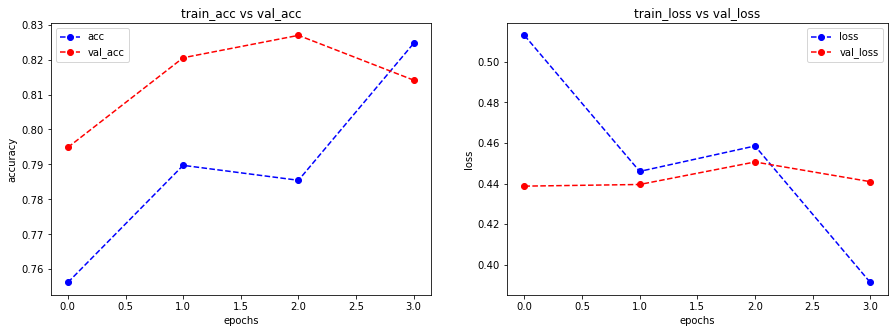

In [107]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    """
    Plot the accuracy and the loss during the training of the nn.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], 'bo--', label="acc")
    axes[0].plot(history.history['val_accuracy'], 'ro--', label="val_acc")
    axes[0].set_title("train_acc vs val_acc")
    axes[0].set_ylabel("accuracy")
    axes[0].set_xlabel("epochs")
    axes[0].legend()

    # Plot loss function
    axes[1].plot(history.history['loss'], 'bo--', label="loss")
    axes[1].plot(history.history['val_loss'], 'ro--', label="val_loss")
    axes[1].set_title("train_loss vs val_loss")
    axes[1].set_ylabel("loss")
    axes[1].set_xlabel("epochs")

    axes[1].legend()

    plt.show()

# Assuming 'history' is the standard Keras history object
plot_accuracy_loss(history)


In [108]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 46s 3s/step - loss: 0.4754 - accuracy: 0.7846


In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=128, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units, return_sequences=True))  # Return sequences for additional GRU layer
    model.add(GRU(gru_units))
    model.add(Dense(128, activation='relu'))  # Increase model capacity by adding more neurons
    model.add(Dropout(0.5))  # Regularization: Dropout layer with dropout rate of 0.5
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Regularization: Batch normalization layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, batch_size=28, epochs=5, validation_split=0.2)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [110]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 40s 3s/step - loss: 0.4921 - accuracy: 0.7897


In [112]:
# Define hyperparameters to tune
param_grid = {
    'gru_units': [64, 128, 256],
    'batch_size': [16, 32, 64],
}
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(gru_units=128, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units, return_sequences=True))  # Return sequences for additional GRU layer
    model.add(GRU(gru_units))
    model.add(Dense(128, activation='relu'))  # Increase model capacity by adding more neurons
    model.add(Dropout(0.5))  # Regularization: Dropout layer with dropout rate of 0.5
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Regularization: Batch normalization layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define hyperparameters to tune
param_grid = {
    'gru_units': [64, 128, 256],
    'batch_size': [16, 32, 64],
}

# Create the model
model = build_densenet_gru_model()

# Wrap the model with KerasClassifier for use with GridSearchCV
keras_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_densenet_gru_model)

# Perform grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid_search.fit(train_images, train_labels)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

<ipython-input-112-5d74f2d2266a>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_densenet_gru_model)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=16, gru_units=64; total time= 1.9min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=16, gru_units=64; total time= 3.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=16, gru_units=64; total time= 1.3min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=128; total time=  33.0s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=128; total time= 2.4min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=128; total time=  18.7s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=256; total time=  13.7s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=256; total time=  12.9s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=16, gru_units=256; total time= 1.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=32, gru_units=64; total time=  50.9s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=32, gru_units=64; total time=  37.8s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=32, gru_units=64; total time= 1.4min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=128; total time=  47.7s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=128; total time=  21.8s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=128; total time=  28.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=256; total time= 2.7min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=256; total time= 1.3min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=32, gru_units=256; total time=  22.2s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=64, gru_units=64; total time= 1.4min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=64, gru_units=64; total time=  34.3s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END ........................batch_size=64, gru_units=64; total time=   9.2s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=128; total time=  15.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=128; total time=  40.7s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=128; total time=  10.1s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=256; total time=  12.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=256; total time=   8.0s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  


[CV] END .......................batch_size=64, gru_units=256; total time=  11.7s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  # With a non-custom callable, we can select the best score


AttributeError: 'Sequential' object has no attribute 'loss'

In [113]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report

# Function to create model
def create_model(gru_units=64, input_shape=(28, 28)):
    model = Sequential()
    model.add(GRU(units=gru_units, input_shape=input_shape))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=16, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'gru_units': [64, 128, 256]
}

# Perform grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid_search.fit(train_images, train_labels)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Make predictions
predictions = best_model.predict(test_images)
print(classification_report(test_labels, predictions))


<ipython-input-113-26b10e9cd197>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=16, verbose=0)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=16, gru_units=64; total time= 1.2min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=16, gru_units=64; total time=  44.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=16, gru_units=64; total time= 1.3min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=128; total time=  37.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=128; total time=  54.3s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=128; total time= 1.5min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=256; total time= 1.3min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=256; total time= 1.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=16, gru_units=256; total time=  59.3s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=32, gru_units=64; total time= 1.8min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=32, gru_units=64; total time=  59.6s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=32, gru_units=64; total time= 1.4min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=128; total time=  50.9s


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=128; total time= 2.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=128; total time= 2.5min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=256; total time= 1.6min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=256; total time= 2.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=32, gru_units=256; total time= 1.9min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=64, gru_units=64; total time= 2.6min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=64, gru_units=64; total time= 2.4min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END ........................batch_size=64, gru_units=64; total time= 3.8min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=128; total time= 2.6min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=128; total time= 2.0min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=128; total time= 2.6min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=256; total time= 1.5min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=256; total time= 2.1min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    split_progress=None,
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VASAVI\AppData\Local\Temp\__autograph_generated_file81f8ch5p.py", line 15, in tf__train_function
    retval_ = a

[CV] END .......................batch_size=64, gru_units=256; total time= 2.2min


C:\Users\VASAVI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  # With a non-custom callable, we can select the best score


ValueError: in user code:

    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\VASAVI\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_69" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 256, 256, 3)


In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=256, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units, return_sequences=True))  # Return sequences for additional GRU layer
    model.add(GRU(gru_units))
    model.add(Dense(128, activation='relu'))  # Increase model capacity by adding more neurons
    model.add(Dropout(0.5))  # Regularization: Dropout layer with dropout rate of 0.5
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Regularization: Batch normalization layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, batch_size=64, epochs=50, validation_split=0.2)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

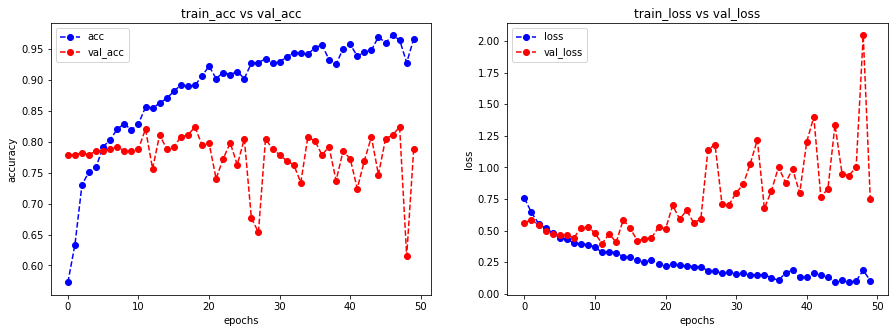

In [28]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    """
    Plot the accuracy and the loss during the training of the nn.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], 'bo--', label="acc")
    axes[0].plot(history.history['val_accuracy'], 'ro--', label="val_acc")
    axes[0].set_title("train_acc vs val_acc")
    axes[0].set_ylabel("accuracy")
    axes[0].set_xlabel("epochs")
    axes[0].legend()

    # Plot loss function
    axes[1].plot(history.history['loss'], 'bo--', label="loss")
    axes[1].plot(history.history['val_loss'], 'ro--', label="val_loss")
    axes[1].set_title("train_loss vs val_loss")
    axes[1].set_ylabel("loss")
    axes[1].set_xlabel("epochs")

    axes[1].legend()

    plt.show()

# Assuming 'history' is the standard Keras history object
plot_accuracy_loss(history)


In [29]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 43s 3s/step - loss: 2.9936 - accuracy: 0.6846


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# Load your data
train_images, train_labels = load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Define the function to build the model
def build_densenet_gru_model(input_shape=(256, 256, 3), gru_units=256, num_classes=2):
    # DenseNet121 base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, -1)))  # Flatten for GRU input
    model.add(GRU(gru_units, return_sequences=True))  # Return sequences for additional GRU layer
    model.add(GRU(gru_units))
    model.add(Dense(128, activation='relu'))  # Increase model capacity by adding more neurons
    model.add(Dropout(0.5))  # Regularization: Dropout layer with dropout rate of 0.5
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Regularization: Batch normalization layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build and compile the model
model = build_densenet_gru_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with early stopping
history = model.fit(train_images, train_labels, batch_size=64, epochs=50, 
                    validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(train_images, train_labels)
print("Final Model - Loss:", loss, "Accuracy:", accuracy)


Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_01_27 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image 

In [35]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 83s 3s/step - loss: 0.6469 - accuracy: 0.7897
